In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [37]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Modification

In [38]:
df['height'] = df['height']/100
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0


In [51]:
df['overweight'] = (df['weight']/(df['height']**2)).apply(lambda x: 1 if x >= 25 else 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


In [40]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


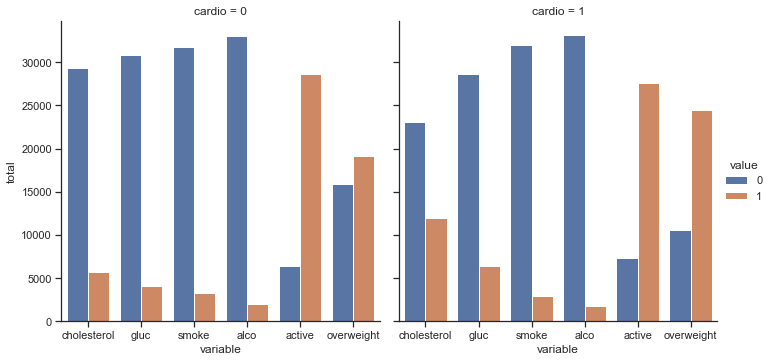

In [49]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
g = sns.catplot(x="variable", kind = "count", data=df_cat, hue = 'value', col= 'cardio')
g.set_axis_labels('variable', 'total')
fig = g.fig
fig.savefig('catplot.png')

In [53]:
df_heat = df[(df['ap_lo'] <= df['ap_hi'])
          & (df['height'] >= df['height'].quantile(0.025))
          & (df['height'] >= df['height'].quantile(0.975))
          & (df['height'] >= df['height'].quantile(0.025))
          & (df['height'] >= df['height'].quantile(0.975))]
df_heat.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
14,23,14532,2,1.81,95.0,130,90,0,0,1,1,1,0,1
62,81,20330,2,1.87,115.0,130,90,0,0,0,1,1,0,1
74,103,16039,2,1.80,90.0,140,90,1,1,0,0,0,0,1
76,105,20397,2,1.88,105.0,120,80,0,0,0,0,1,1,1
94,127,15946,2,1.85,88.0,133,89,1,1,0,0,1,0,1


In [60]:
corr = df_heat.corr()

In [58]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<AxesSubplot:>

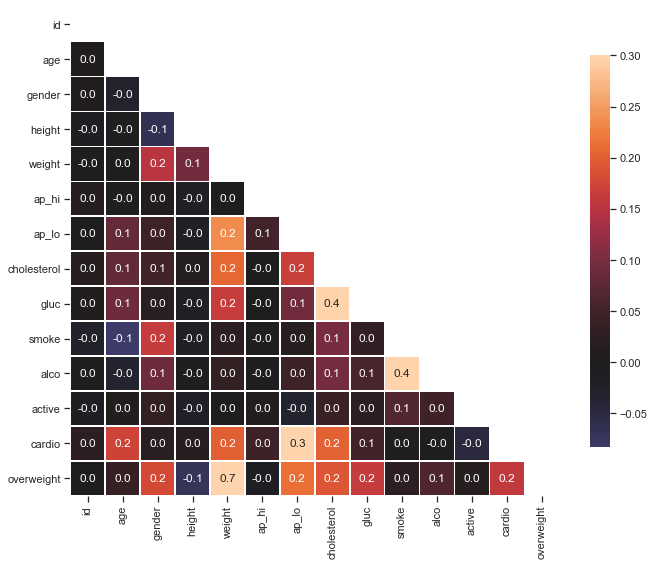

In [59]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot=True, fmt=".1f")
